In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising_data = pd.read_csv('./datasets/advertising.csv')

In [3]:
advertising_data.sample(10)

TV  Radio  Newspaper  Sales
81   239.8    4.1       36.9   12.3
110  225.8    8.2       56.5   13.4
100  222.4    4.3       49.8   11.7
4    180.8   10.8       58.4   12.9
90   134.3    4.9        9.3   11.2
76    27.5    1.6       20.7    6.9
5      8.7   48.9       75.0    7.2
43   206.9    8.4       26.4   12.9
148   38.0   40.3       11.9   10.9
172   19.6   20.1       17.0    7.6

In [4]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising_data.shape

(200, 4)

In [6]:
advertising_data.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [7]:
advertising_data.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

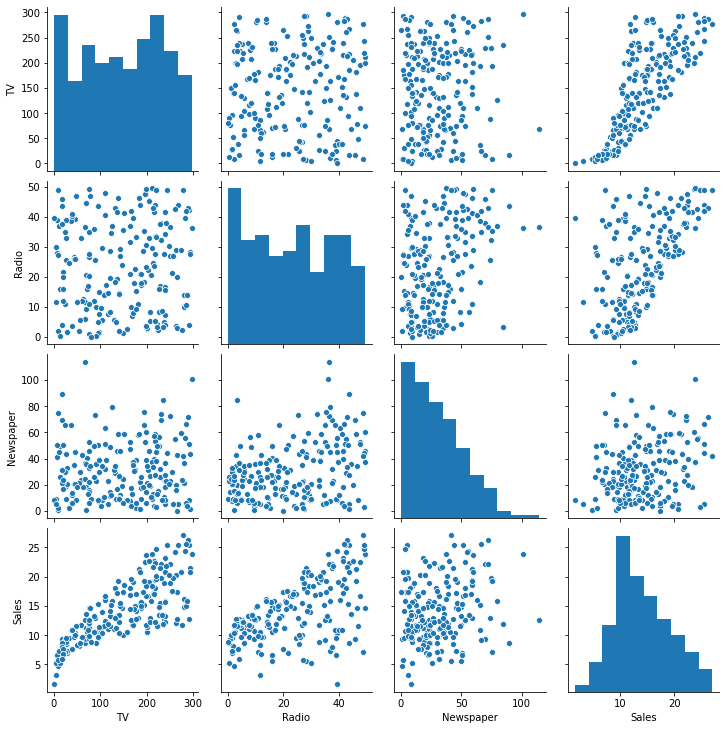

In [8]:
sns.pairplot(advertising_data)

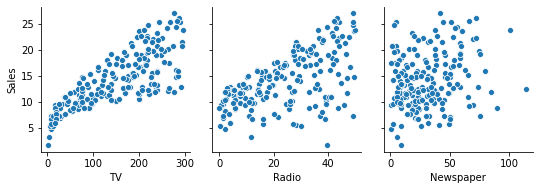

In [13]:
#plot all independent variables wrt sales
sns.pairplot(advertising_data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [14]:
from sklearn.model_selection import train_test_split

In [26]:
X = advertising_data[['TV','Radio','Newspaper']]
y = advertising_data[['Sales']]

In [27]:
X.shape

(200, 3)

In [28]:
y.shape

(200, 1)

In [34]:
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size=0.80, random_state=25)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
X_train.shape

(160, 3)

In [38]:
y_train.shape

(160, 1)

In [40]:
lm.fit(X_train,y_train)

LinearRegression()

In [42]:
print(lm.intercept_)

[3.18735249]


In [44]:
lm.coef_

array([[ 0.04597936,  0.18530829, -0.00522954]])

In [47]:
X_test.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [49]:
y_pred=lm.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
mean_squared_error(y_pred,y_test)

3.2898702919167135

In [52]:
r2_score(y_pred,y_test)

0.8380795459094381

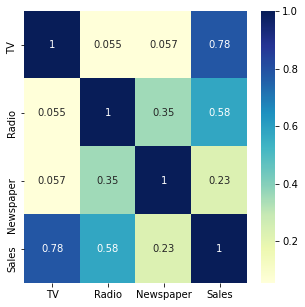

In [59]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising_data.corr(),cmap='YlGnBu',annot=True)

In [75]:
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train,X_train_sm).fit()
lm_1.params

const        3.187352
TV           0.045979
Radio        0.185308
Newspaper   -0.005230
dtype: float64

In [76]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     472.1
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           5.13e-78
Time:                        18:07:22   Log-Likelihood:                -305.96
No. Observations:                 160   AIC:                             619.9
Df Residuals:                     156   BIC:                             632.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1874      0.336      9.483      0.0

In [65]:
X1 = advertising_data[['TV','Radio']]

In [66]:
X_train1, X_test1,y_train1, y_test1 = train_test_split(X1,y,train_size=0.80, random_state=8)

In [67]:
lm.fit(X_train1,y_train1)

LinearRegression()

In [68]:
y_pred1=lm.predict(X_test1)

In [73]:
mean_squared_error(y_pred1,y_test1)

4.286861517616687

In [74]:
r2_score(y_pred1,y_test1)

0.7900301501283791